# Bias/variance decomposition

In [4]:
from mlxtend.evaluate import bias_variance_decomp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

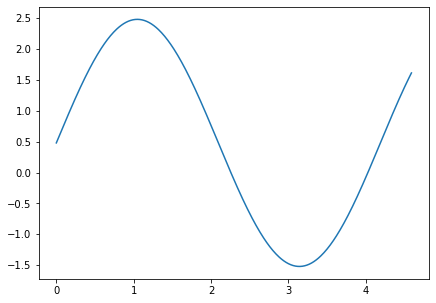

In [2]:
plt.rcParams["figure.figsize"] = (7,5)

e = np.random.normal(0, 1)
x = np.arange(0, 4.6,.01)
y = 2*np.sin(3*x/2) + e
plt.plot(x, y)
plt.show()

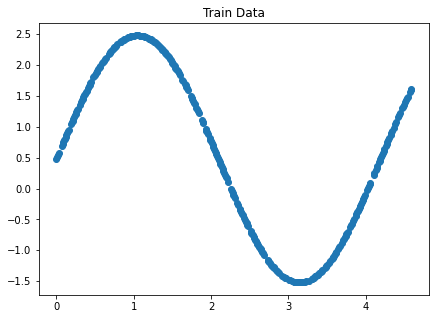

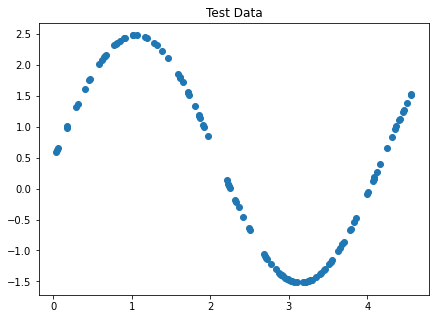

In [5]:
# Create features x, x^2, ..., x^9
output = pd.DataFrame()
output["y"] = y
features = pd.DataFrame()
for i in range(1,10):
    features["x^"+str(i)] = pow(x,i)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.25, random_state=1)
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

# Plot what the train data and test data looks like
plt.scatter(X_train.values[:,0],y_train)
plt.title("Train Data")
plt.show()
plt.scatter(X_test.values[:,0],y_test)
plt.title("Test Data")
plt.show()


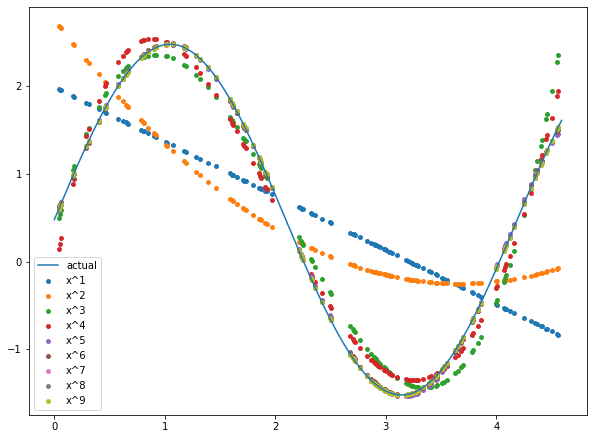

In [6]:
# Regression predicting y 
# using {x}, {x, x^2}, {x, x^2, x^3}, ... as features
plt.rcParams["figure.figsize"] = (10,7.5)

for i in range(1,10): 
    Xp2_train = X_train.iloc[:,0:i]
    Xp2_test = X_test.iloc[:,0:i]
    lrp2 = LinearRegression()
    lrp2.fit(Xp2_train,y_train)
    pred_test = lrp2.predict(Xp2_test)
    xi = X_test["x^1"]
    plt.scatter(xi,pred_test, label="x^"+str(i), s=15)
    plt.legend()
plt.plot(x,y, label="actual")
plt.legend()
plt.show()

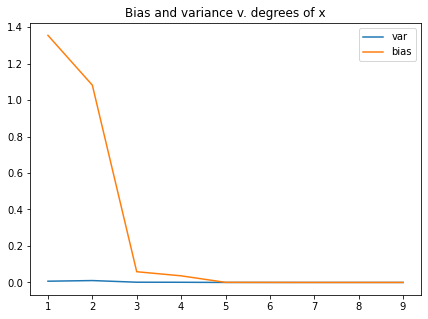

var: [0.006815814115814797, 0.01031485664317447, 0.0012814723131402517, 0.000976375947229055, 2.2887991507106683e-05, 8.791186833379477e-06, 1.0302287600249538e-07, 3.699576754757552e-08, 1.6042759401690817e-10]
bias: [1.3546813405745755, 1.0816307522592565, 0.058786123740697534, 0.03627883659359445, 0.0005352715723132756, 0.00021200052050711964, 1.6102387303277701e-06, 4.0063563761506585e-07, 1.863560784239154e-09]


In [7]:
# Get the MSE, bias, and variance using bias_variance_decomp
mse_list = list()
bias_list = list()
var_list = list()

for i in range(1,10): 
    Xp2_train = X_train.iloc[:,0:i].sort_index()
    Xp2_test = X_test.iloc[:,0:i].sort_index()
    lrp2 = LinearRegression()
    
    mse, bias, var = bias_variance_decomp(lrp2, Xp2_train.values, y_train.iloc[:,0].values, 
                                          Xp2_test.values, y_test.iloc[:,0].values, loss="mse")
    
    mse_list.append(mse)
    bias_list.append(bias)
    var_list.append(var)

plt.rcParams["figure.figsize"] = (7,5)
plt.plot(np.arange(1, 10, 1),var_list, label="var")

plt.plot(np.arange(1, 10, 1),bias_list, label="bias")
plt.title("Bias and variance v. degrees of x")
plt.legend()
plt.show()
print("var:", var_list)
print("bias:",bias_list)